# Exercício

1. **Leitura e Carregamento de Dados:**
   - Usar bibliotecas como Pandas para carregar dados de diferentes fontes (CSV, Excel, SQL, etc.).

2. **Padronização:**
   - Padronizar as colunas de valores, deixar todas como tipo flutuante.

3. **Duplicados:**
   - Checar se exeistem dados duplicados.

4. **Dados faltantes:**
   - Checar se existem dados faltantes e substituí-los ou removê-los.

5. **Tratamento de Dados Categóricos:**
   - Converter variáveis categóricas em numéricas usando codificação one-hot (pandas `get_dummies`) ou Label Encoding (scikit-learn `LabelEncoder`).

6. **Redução de Dimensionalidade:**
   - Usar técnicas como PCA (Análise de Componentes Principais) para reduzir a dimensionalidade de dados.

7. **Estatisticas:**
   - Usar a função describe nos dados
  
8. **Medidas Básicas:**
   - Criar um dataframe com as medidas básicas de cada coluna (média, mediana, variância e desvio padrão).

9.  **Detectar e remover outliers:**
    - Criar uma função que detecte e remova os outliers dos dados usando o método de intervalo interquartil (IQR).

10. **Correlação:**
    - Verificar a correlação entre as variáveis.

11. **Normalização:**
    - Normalizar dados numéricos para terem média zero e desvio padrão 1 usando `StandardScaler` do scikit-learn.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
# 1. Leitura e Carregamento de Dados
pd.set_option('display.max_columns', 35)
df = pd.read_csv('../../Datasets/world-data-2023.csv')
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175","2,740.27",254.90%,VED,2.27,52.70%,$0.00,"$482,359,318,768",97.20%,79.30%,21.4,Caracas,72.1,125.0,$0.01,Spanish,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",163.52,2.80%,VND,2.05,48.10%,$0.80,"$261,921,244,843",110.60%,28.50%,16.5,Ho Chi Minh City,75.3,43.0,$0.73,Vietnamese,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",157.58,8.10%,YER,3.79,1.00%,$0.92,"$26,914,402,224",93.60%,10.20%,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",212.31,9.20%,ZMW,4.63,65.20%,$1.40,"$23,064,722,446",98.70%,4.10%,40.4,Lusaka,63.5,213.0,$0.24,English,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [3]:
len(df['Country'].unique())

195

In [4]:
# 2. Padronizar as colunas de valores, deixar todas como tipo flutuante.

# Lista de colunas a serem convertidas
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage', 
                      'Out of pocket health expenditure', 'Physicians per thousand', 
                      'Population', 'Population: Labor force participation (%)', 
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

In [5]:
# Substituição dos símbolos desnecessários
df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x) \
                                               .replace(',', '') \
                                               .replace('$', '') \
                                               .replace('%', '')))

In [6]:
df

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912050.0,343000.0,17.88,58.0,Caracas,164175.0,2740.27,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,6.423750,-66.589730
191,Vietnam,314.0,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,Yemen,56.0,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,15.552727,48.516388
193,Zambia,25.0,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


In [7]:
df.dtypes

Country                                       object
Density\n(P/Km2)                             float64
Abbreviation                                  object
Agricultural Land( %)                        float64
Land Area(Km2)                               float64
Armed Forces size                            float64
Birth Rate                                   float64
Calling Code                                 float64
Capital/Major City                            object
Co2-Emissions                                float64
CPI                                          float64
CPI Change (%)                               float64
Currency-Code                                 object
Fertility Rate                               float64
Forested Area (%)                            float64
Gasoline Price                               float64
GDP                                          float64
Gross primary education enrollment (%)       float64
Gross tertiary education enrollment (%)      f

In [10]:
# 3. Checar se exeistem dados duplicados
df.duplicated().sum()

0

In [8]:
# 4. Checar se existem dados faltantes e substituí-los ou removê-los

# Identifica quantidade de valores faltantes e a representatividade em %
def missing_values(df):

    for column in df.columns:
        if df[column].isna().sum() > 0:
            print(f"{column}: {df[column].isna().sum()} missing values.")
            print(f"Wich represents {round(df[column].isna().sum() / len(df), 2)}% of missing values.")
            print("-=" * 30)
        else:
            print(f"{column}: 0 missing values.")
            

In [9]:
missing_values(df)

Country: 0 missing values.
Density
(P/Km2): 0 missing values.
Abbreviation: 7 missing values.
Wich represents 0.04% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Agricultural Land( %): 7 missing values.
Wich represents 0.04% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Land Area(Km2): 1 missing values.
Wich represents 0.01% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Armed Forces size: 24 missing values.
Wich represents 0.12% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Birth Rate: 6 missing values.
Wich represents 0.03% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Calling Code: 1 missing values.
Wich represents 0.01% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Capital/Major City: 3 missing values.
Wich represents 0.02% of missing values.
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

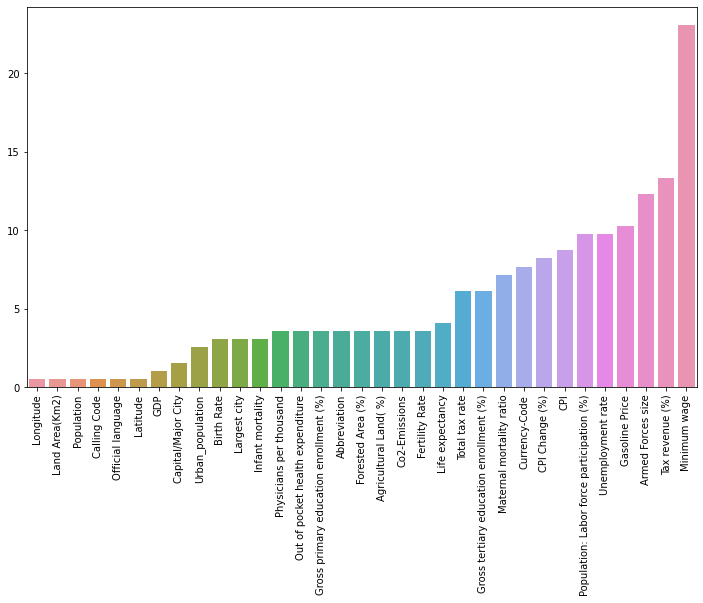

In [19]:
#Porcentagem de valores faltantes
def percent_missing(df):
    percent_nan = 100 * df.isna().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

result_nan = percent_missing(df)
plt.figure(figsize=(12,7))
sns.barplot(x=result_nan.index, y=result_nan)
plt.xticks(rotation=90)

In [10]:
# Preencher valores ausentes com a mediana
def replace_nan_values(dataset):

    for i in dataset.columns:

        if(dataset[i].dtypes=='object'):
            dataset[i] = dataset[i].replace(np.nan, 'Não informado')
        else:
            dataset[i] = dataset[i].fillna(dataset[i].median())

    return dataset

In [11]:
data_filled = replace_nan_values(df)

data_filled.isna().sum().sum()

0

In [31]:
data_filled

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.430,Pashto,78.4,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.120,Albanian,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.950,Arabic,28.1,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164.0,AD,40.0,468.0,31000.0,7.20,376.0,Andorra la Vella,469.0,125.34,2.3,EUR,1.27,34.0,1.51,3.154058e+09,106.4,31.2,2.7,Andorra la Vella,73.2,53.0,6.630,Catalan,36.4,3.33,77142.0,62.45,16.3,37.2,5.36,67873.0,42.506285,1.521801
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.710,Portuguese,33.4,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912050.0,343000.0,17.88,58.0,Caracas,164175.0,2740.27,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.010,Spanish,45.8,1.92,28515829.0,59.70,16.3,73.3,8.80,25162368.0,6.423750,-66.589730
191,Vietnam,314.0,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.730,Vietnamese,43.5,0.82,96462106.0,77.40,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,Yemen,56.0,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,1.045,Arabic,81.0,0.31,29161922.0,38.00,16.3,26.6,12.91,10869523.0,15.552727,48.516388
193,Zambia,25.0,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.240,English,27.5,1.19,17861030.0,74.60,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


In [32]:
# 5. Converter variáveis categóricas em numéricas

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

df_encoder = data_filled.copy()

# Iterar através das colunas do DataFrame
for column in df.columns:
    if df_encoder[column].dtype == 'object':
        df_encoder[column] = label_encoder.fit_transform(df_encoder[column])


df_encoder

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,0,60.0,2,58.1,652230.0,323000.0,32.49,93.0,74,8672.0,149.90,2.3,1,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,72,64.5,638.0,0.430,51,78.4,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,1,105.0,4,43.1,28748.0,9000.0,11.78,355.0,173,4536.0,119.05,1.4,2,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,172,78.5,15.0,1.120,1,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,2,18.0,47,17.4,2381741.0,317000.0,24.28,213.0,4,150006.0,151.36,2.0,33,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,3,76.7,112.0,0.950,3,28.1,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,3,164.0,0,40.0,468.0,31000.0,7.20,376.0,7,469.0,125.34,2.3,37,1.27,34.0,1.51,3.154058e+09,106.4,31.2,2.7,7,73.2,53.0,6.630,10,36.4,3.33,77142.0,62.45,16.3,37.2,5.36,67873.0,42.506285,1.521801
4,4,26.0,6,47.5,1246700.0,117000.0,40.73,244.0,92,34693.0,261.73,17.1,4,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,92,60.8,241.0,0.710,54,33.4,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,32.0,181,24.5,912050.0,343000.0,17.88,58.0,43,164175.0,2740.27,254.9,124,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,38,72.1,125.0,0.010,62,45.8,1.92,28515829.0,59.70,16.3,73.3,8.80,25162368.0,6.423750,-66.589730
191,191,314.0,182,39.3,331210.0,522000.0,16.75,84.0,65,192668.0,163.52,2.8,125,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,65,75.3,43.0,0.730,77,43.5,0.82,96462106.0,77.40,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,192,56.0,185,44.6,527968.0,40000.0,30.45,967.0,153,10609.0,157.58,8.1,131,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,146,66.1,164.0,1.045,3,81.0,0.31,29161922.0,38.00,16.3,26.6,12.91,10869523.0,15.552727,48.516388
193,193,25.0,187,32.1,752618.0,16000.0,36.19,260.0,93,5141.0,212.31,9.2,133,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,93,63.5,213.0,0.240,17,27.5,1.19,17861030.0,74.60,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


In [48]:
# 6. Redução de Dimensionalidade

# Inicializar o PCA com todas componente principal
pca = PCA()

# Aplicar o PCA ao DataFrame
data_reduced = pca.fit_transform(df_encoder)

# Variância explicada pelo componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Vetores dos componentes principais:
loadings = pca.components_

print("Vetores dos componentes principais:")
print(loadings)

print("DataFrame original:")
print(df_encoder)
print("\nVariância explicada pelo componente principal:", explained_variance_ratio)


Vetores dos componentes principais:
[[ 6.42763345e-13 -1.72382443e-11 -2.79210319e-13 ...  2.70436565e-05
   1.50936718e-12 -8.43186884e-14]
 [-4.52891570e-08 -1.42519386e-07 -3.14839350e-08 ...  3.70025568e-01
  -1.11773590e-08  8.89004369e-08]
 [ 4.31825749e-07  3.36601318e-06  3.71416109e-07 ... -9.28477099e-01
   8.18538263e-08  4.12268731e-08]
 ...
 [-9.32380087e-05 -1.07197944e-04  1.26545287e-03 ...  4.04598964e-10
  -1.16509012e-02  9.38838276e-04]
 [ 1.09603650e-03  3.94373162e-05 -7.80363708e-04 ... -7.66380104e-10
   1.36396771e-03  6.48837736e-05]
 [ 7.55483486e-05 -2.73974293e-05 -7.98073431e-05 ... -4.11801007e-10
  -9.27965252e-04  1.94465940e-04]]
DataFrame original:
     Country  Density\n(P/Km2)  Abbreviation  Agricultural Land( %)  \
0          0              60.0             2                   58.1   
1          1             105.0             4                   43.1   
2          2              18.0            47                   17.4   
3          3            

In [52]:
explained_variance_ratio

array([9.99999997e-01, 3.11127629e-09, 3.57856684e-11, 4.98923335e-13,
       6.38431731e-15, 5.13518042e-15, 8.38621059e-19, 3.27120577e-20,
       1.98891058e-20, 8.84529860e-21, 1.29479034e-21, 1.05924197e-21,
       8.21607066e-22, 2.41267139e-22, 1.71495101e-22, 1.28286777e-22,
       1.21748610e-22, 1.04718706e-22, 8.73821531e-23, 6.68613927e-23,
       6.41787464e-23, 5.23687106e-23, 3.78804777e-23, 3.16632478e-23,
       2.17454285e-23, 1.42593464e-23, 1.07902119e-23, 5.51448252e-24,
       3.37520474e-24, 2.89167227e-24, 1.06186628e-24, 6.66493802e-25,
       1.92274558e-25, 1.43107048e-26, 6.77184650e-27])

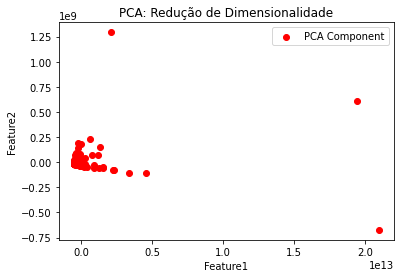

In [43]:
# Plotar os dados reduzidos de PCA
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], color='red', label='PCA Component')

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('PCA: Redução de Dimensionalidade')
plt.legend()
plt.show()

In [74]:
# 7. Usar a função describe nos dados
df_encoder.describe()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,195.000000,195.000000,195.000000,195.000000,1.950000e+02,1.950000e+02,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000
mean,97.000000,356.764103,95.107692,39.134872,6.867007e+05,1.434872e+05,20.145282,360.007692,96.287179,1.718583e+05,184.783744,6.359487,69.953846,2.681872,32.014872,1.000154,4.727532e+11,102.473077,37.547179,21.107179,95.000000,72.317436,152.682051,1.928949,33.035897,32.567692,1.826205,3.922447e+07,62.710000,16.537436,40.599487,6.737641,2.185258e+07,19.083026,20.236230
std,56.435804,1982.888967,54.210678,21.386637,1.917085e+06,3.588039e+05,9.798615,322.490008,55.641707,8.240967e+05,380.557800,23.452045,40.188896,1.261755,23.358162,0.349395,2.161411e+12,12.912165,28.388404,19.285229,54.224619,7.330019,226.629794,2.648408,22.095009,18.827087,1.655113,1.447345e+08,9.975707,6.479029,19.930828,4.845382,7.450449e+07,23.900297,66.543960
min,0.000000,2.000000,0.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.000000,0.000000,1.100000e+01,99.030000,-4.300000,0.000000,0.980000,0.000000,0.000000,4.727146e+07,23.400000,0.800000,1.400000,0.000000,52.800000,2.000000,0.010000,0.000000,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03,-40.900557,-175.198242
25%,48.500000,35.500000,48.500000,22.650000,2.445650e+04,1.250000e+04,11.450000,83.000000,48.500000,2.625500e+03,114.470000,1.050000,37.000000,1.710000,11.450000,0.790000,8.476801e+09,99.350000,12.650000,6.100000,48.500000,67.450000,16.500000,0.530000,17.000000,17.700000,0.360000,2.004434e+06,57.250000,12.550000,30.900000,3.590000,1.218046e+06,4.553072,-7.658537
50%,97.000000,89.000000,97.000000,39.600000,1.195110e+05,3.100000e+04,17.950000,255.500000,97.000000,1.230300e+04,125.340000,2.300000,71.000000,2.245000,32.000000,0.980000,3.438723e+10,102.550000,31.200000,14.000000,97.000000,73.200000,53.000000,1.045000,22.000000,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652
75%,145.500000,216.500000,139.500000,54.850000,5.205440e+05,1.230000e+05,28.445000,506.500000,143.500000,6.194100e+04,155.605000,3.750000,105.500000,3.565000,47.450000,1.185000,2.304710e+11,107.550000,61.100000,31.550000,140.500000,77.250000,175.000000,1.625000,54.500000,43.750000,2.875000,2.856227e+07,68.300000,20.300000,47.300000,8.840000,1.460139e+07,40.106102,48.046657
max,194.000000,26337.000000,188.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,192.000000,9.893038e+06,4583.710000,254.900000,133.000000,6.910000,98.300000,2.000000,2.142770e+13,142.500000,136.600000,84.500000,188.000000,85.400000,1150.000000,13.590000,77.000000,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032


In [69]:
# 8. Criar um dataframe com as medidas básicas de cada coluna (média, mediana, variância e desvio padrão).

df_caract = pd.DataFrame()

for i, column in enumerate(df_encoder.select_dtypes(include=np.number).columns.tolist()):
    media = round(df_encoder[column].mean(),2)
    std = round(df_encoder[column].std(), 2)
    variance = df_encoder[column].var()
    median = round(df_encoder[column].median(), 2)

    append_values = {"Atributo": column, "Variancia": variance , "Media": media, "Mediana": median}

    df_caract = df_caract.append(append_values, ignore_index=True)

df_caract

,Atributo,Variancia,Media,Mediana
0,Country,3.185000e+03,9.700000e+01,9.700000e+01
1,Density\n(P/Km2),3.931849e+06,3.567600e+02,8.900000e+01
2,Abbreviation,2.938798e+03,9.511000e+01,9.700000e+01
3,Agricultural Land( %),4.573883e+02,3.913000e+01,3.960000e+01
4,Land Area(Km2),3.675215e+12,6.867007e+05,1.195110e+05
5,Armed Forces size,1.287403e+11,1.434872e+05,3.100000e+04
6,Birth Rate,9.601286e+01,2.015000e+01,1.795000e+01
7,Calling Code,1.039998e+05,3.600100e+02,2.555000e+02
8,Capital/Major City,3.096000e+03,9.629000e+01,9.700000e+01
9,Co2-Emissions,6.791354e+11,1.718584e+05,1.230300e+04


In [72]:
# 9. Criar uma função que detecte e remova os outliers dos dados por IQR

def remove_outliers_iqr(df, threshold=1.5):
    
    for column_name in df.columns:
    
        Q1 = df[column_name].quantile(0.25)
        # ou Q1 = df_encoder.describe().T['25%']

        Q3 = df[column_name].quantile(0.75)
        # ou Q3 = df_encoder.describe().T['75%']
        
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_cleaned

In [78]:
df_cleaned = remove_outliers_iqr(df_encoder)
df_cleaned.shape

(177, 35)

In [77]:
# 10. Verificar a correlação entre as variáveis
correlation_matrix = df_cleaned.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Country,1.000000,0.040890,0.814412,0.086316,-0.036201,-0.012199,0.017275,-0.006122,-0.049845,-0.056600,0.162132,0.159544,0.532120,0.015320,-0.017390,-0.038871,-0.057156,-0.081247,-0.061307,-0.028994,-0.046906,-0.007988,-0.001105,0.021094,0.151596,-0.071014,-0.032463,-0.067456,0.003773,-0.066738,-0.191850,0.022323,-0.076664,0.027360,0.111566
Density (P/Km2),0.040890,1.000000,0.037429,-0.042127,-0.051506,-0.023825,-0.152278,0.006786,0.037370,-0.015757,-0.026964,-0.031127,-0.060838,-0.075935,-0.031001,0.228669,-0.014408,0.006931,0.024223,-0.112616,0.028560,0.069501,-0.068338,0.303076,-0.056118,-0.109144,0.209888,-0.017475,0.019670,-0.010252,-0.044256,-0.060309,-0.021997,0.060933,0.042738
Abbreviation,0.814412,0.037429,1.000000,0.130629,-0.005720,-0.031708,0.127226,0.050362,0.015498,-0.068980,0.168650,0.162930,0.652559,0.111781,-0.057703,-0.091173,-0.107746,-0.064894,-0.132673,0.077124,-0.055926,-0.117802,0.078182,-0.092050,0.195568,-0.041195,-0.111966,-0.068459,-0.031734,0.059356,-0.134494,0.006512,-0.087221,-0.086280,0.156636
Agricultural Land( %),0.086316,-0.042127,0.130629,1.000000,-0.021958,0.027643,0.214832,-0.049165,-0.138280,0.068696,-0.014045,-0.023509,0.003783,0.203377,-0.411895,0.052663,0.077680,-0.018744,-0.138496,0.209722,-0.162939,-0.255965,0.199721,0.018315,0.087311,0.095168,-0.066230,0.116451,-0.121781,-0.029863,0.149563,0.044696,0.103287,-0.059237,0.029524
Land Area(Km2),-0.036201,-0.051506,-0.005720,-0.021958,1.000000,0.599068,0.006028,-0.174430,-0.082565,0.572973,0.041996,0.052370,-0.029596,0.006359,0.007878,-0.171818,0.493847,0.016270,0.118797,-0.001139,0.048398,-0.041714,-0.005057,-0.090861,0.142554,0.038831,0.019607,0.483529,-0.018886,-0.163155,0.134895,0.022788,0.572466,0.007836,0.150938
Armed Forces size,-0.012199,-0.023825,-0.031708,0.027643,0.599068,1.000000,-0.114175,-0.155395,-0.075328,0.729586,0.045723,0.062563,-0.088251,-0.121485,-0.026316,-0.147962,0.643992,0.054365,0.085011,-0.054850,0.033034,0.054379,-0.088072,-0.045570,0.162764,0.161440,0.000436,0.876935,-0.082412,-0.163713,0.100666,-0.057728,0.845183,0.094240,0.314428
Birth Rate,0.017275,-0.152278,0.127226,0.214832,0.006028,-0.114175,1.000000,0.021118,-0.136190,-0.122182,0.143327,0.107925,0.367110,0.978364,-0.094533,-0.222452,-0.164752,-0.089984,-0.709989,0.874707,-0.205528,-0.873564,0.781703,-0.422033,-0.070240,0.293947,-0.728027,-0.033958,0.175517,-0.406827,0.222890,-0.017279,-0.079081,-0.515769,0.040457
Calling Code,-0.006122,0.006786,0.050362,-0.049165,-0.174430,-0.155395,0.021118,1.000000,0.019398,-0.117261,-0.071207,-0.083031,-0.061606,-0.029804,-0.170162,-0.211040,-0.149842,-0.044862,-0.165536,-0.065470,0.069064,0.025452,-0.134315,-0.110010,-0.103033,0.074221,0.028518,-0.142681,0.068665,-0.103095,-0.257757,-0.092918,-0.158106,0.085197,0.190333
Capital/Major City,-0.049845,0.037370,0.015498,-0.138280,-0.082565,-0.075328,-0.136190,0.019398,1.000000,-0.089270,-0.072805,-0.100801,0.082282,-0.152354,0.155483,0.020518,-0.105722,0.043786,0.108240,-0.110067,0.737991,0.100721,-0.138791,-0.045849,-0.069783,-0.025748,0.081324,-0.095134,-0.072597,0.217548,-0.077790,0.050140,-0.115145,0.077768,-0.041565
Co2-Emissions,-0.056600,-0.015757,-0.068980,0.068696,0.572973,0.729586,-0.122182,-0.117261,-0.089270,1.000000,-0.009690,-0.002205,-0.093011,-0.112879,-0.034795,-0.043299,0.965946,0.006732,0.101105,-0.093883,0.077703,0.083884,-0.089135,0.007381,0.117961,0

In [80]:
# 11. Normalizar dados numéricos para terem média zero e desvio padrão 1 usando `StandardScaler` do scikit-learn.
scaler = StandardScaler() 
data_StandardScaler = pd.DataFrame.from_records(scaler.fit_transform(df_cleaned))
data_StandardScaler.columns =df_cleaned.columns

data_StandardScaler

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,-1.688858,-0.152303,-1.691233,0.850851,0.041800,0.492644,1.235030,-0.795853,-0.354345,-0.177343,-0.103702,-0.181827,-1.740389,1.397147,-1.254283,-0.829936,-0.207280,0.116944,-0.988494,1.329164,-0.384455,-1.039965,2.025359,-0.557839,0.829277,2.393305,-0.950123,-0.009688,-1.369614,-1.075812,1.519358,0.848620,-0.148889,0.564678,0.996765
1,-1.671131,-0.130605,-1.654003,0.147198,-0.335179,-0.373707,-0.839399,0.018878,1.436080,-0.182670,-0.181246,-0.218547,-1.714914,-0.820745,-0.098662,1.006645,-0.209712,0.342834,0.630578,-0.693435,1.460178,0.846728,-0.630996,-0.268581,-1.428909,1.220461,-0.402991,-0.245346,-0.697195,0.366872,-0.203387,1.093275,-0.256325,0.877469,0.077697
2,-1.653403,-0.172556,-0.853557,-1.058396,1.087523,0.476089,0.412671,-0.422694,-1.620303,0.004698,-0.100032,-0.194067,-0.925176,0.268745,-1.312064,-1.998669,-0.111283,0.561194,0.501910,-0.073037,-1.657252,0.604153,-0.217406,-0.339848,-1.338581,-0.350605,-0.093742,0.023874,-2.131028,3.252239,1.256986,0.965892,0.140905,0.308642,-0.280110
3,-1.635675,-0.102155,-1.728463,0.001776,-0.352278,-0.313008,-1.298157,0.084180,-1.566048,-0.187909,-0.165435,-0.181827,-0.823274,-1.093118,0.163575,1.424049,-0.217426,0.297656,-0.220060,-0.950673,-1.583466,0.132480,-0.468971,2.041290,-1.022435,0.102167,0.863739,-0.263945,-0.029721,0.010079,-0.173684,-0.316016,-0.278744,0.936130,-0.282775
4,-1.617947,-0.168698,-1.616773,0.353603,0.401238,-0.075727,2.060394,-0.326295,-0.028814,-0.143828,0.177390,0.422019,-1.663963,2.214265,0.710272,-0.078607,-0.159224,0.832263,-1.002791,1.515787,-0.015528,-1.538591,0.332626,-0.440459,0.964768,-0.061485,-0.991752,-0.051321,1.458498,-1.091325,0.415416,-0.006660,0.001444,-1.392560,0.033341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1.679444,-0.165805,1.640857,-0.725333,0.198897,0.547826,-0.228389,-0.904691,-0.914984,0.022948,6.407360,10.124351,1.393089,-0.314910,0.994733,-2.777824,0.087453,-0.395074,1.499087,-0.007466,-1.011630,-0.015761,-0.161977,-0.733910,1.326078,0.614946,0.025200,-0.073485,-0.301655,0.010079,1.613416,0.379530,0.056184,-0.628320,-1.599497
173,1.697171,-0.029825,1.659472,-0.031061,-0.152299,1.041701,-0.341576,-0.823840,-0.517111,0.059648,-0.069468,-0.161427,1.418564,-0.486116,0.790277,-0.551666,-0.052794,0.613902,-0.316561,-0.254617,-0.513579,0.415484,-0.511609,-0.432075,2.003534,0.489479,-0.628980,0.381566,1.448610,0.444435,-0.153882,-0.993366,0.191916,-0.297304,1.781005
174,1.714899,-0.154232,1.715317,0.217563,-0.033333,-0.288176,1.030692,1.921989,1.074378,-0.174848,-0.084398,0.054815,1.571417,0.867965,-1.303174,-0.217742,-0.202309,-0.666142,-0.970624,1.076969,0.980574,-0.824343,0.004312,-0.300023,-1.338581,2.535138,-0.932281,-0.069158,-2.447460,0.010079,-0.698428,1.210547,-0.134578,-0.232510,0.625718
175,1.732627,-0.169180,1.752547,-0.368815,0.102499,-0.354394,1.605642,-0.276540,-0.010728,-0.181891,0.053169,0.099696,1.622368,1.521660,1.550320,1.117953,-0.204758,-0.282129,-1.188644,0.950872,0.002918,-1.174729,0.213239,-0.637490,-0.706289,-0.383336,-0.408938,-0.144842,1.171732,-0.005434,-1.242974,0.911300,-0.174589,-1.476292,0.226185


**Perguntas**

Q1: Quais são os 10 países com a Maior Área Terrestre (Km²)?

Q2: Considerando todos os países, qual deles possui mais espaço dedicado à agricultura?

Q3: Considerando todos os países, qual deles possui a maior porcentagem de Área Florestal?

Q4: Qual país possui a maior população?

Q5: Considerando todos os países, qual é a porcentagem da população que vive em Áreas Urbanas? E a porcentagem da população por país vivendo em Áreas Urbanas?

Q6: Quais são os 10 países com a maior porcentagem de população vivendo em Áreas Rurais?

Q7: Quais são os 10 países com o preço mais alto da gasolina?

Q8: Quais são os 10 países com o maior e o menor GDP?

Q9: Qual é o idioma mais falado?

Q10: Quais são os países com as maiores emissões de CO2?

Q11: Quais são os países com a maior média de expectativa de vida?

Q12: Dentre os Top 10 com maior média de expectativa de vida, qual o país com a maior porcentagem de população vivendo em Áreas Rurais?

In [4]:
df.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [12]:
# Q1: Top 10 Países com a Maior Área Terrestre (Km²)
data_filled.sort_values('Land Area(Km2)', ascending=False).head(10)[['Country', 'Land Area(Km2)']]

,Country,Land Area(Km2)
143,Russia,17098240.0
32,Canada,9984670.0
186,United States,9833517.0
36,China,9596960.0
23,Brazil,8515770.0
8,Australia,7741220.0
77,India,3287263.0
6,Argentina,2780400.0
87,Kazakhstan,2724900.0
2,Algeria,2381741.0


In [20]:
# Q2: País com mais espaço dedicado à agricultura
data_filled[data_filled['Agricultural Land( %)'] == data_filled['Agricultural Land( %)'].max()]['Country'].iloc[0]

'Uruguay'

In [21]:
# Q3: País com a maior porcentagem de Área Florestal
data_filled[data_filled['Forested Area (%)'] == data_filled['Forested Area (%)'].max()]['Country'].iloc[0]

'Suriname'

In [22]:
# Q4: País com a maior população
data_filled.sort_values('Population', ascending=False).head(1)[['Country']]

,Country
36,China


In [24]:
# Q5: Porcentagem da população vivendo em Áreas Urbanas
(data_filled['Urban_population'].sum() / data_filled['Population'].sum()) * 100

55.71160314768032

In [28]:
# Q5: Porcentagem da população por país vivendo em Áreas Urbanas
data_filled['pct_urban_pop'] = data_filled['Urban_population'] / data_filled['Population'] * 100
data_filled[['Country', 'pct_urban_pop']]

,Country,pct_urban_pop
0,Afghanistan,25.753999
1,Albania,61.229014
2,Algeria,73.189001
3,Andorra,87.984496
4,Angola,66.176999
...,...,...
190,Venezuela,88.240002
191,Vietnam,36.628000
192,Yemen,37.272999
193,Zambia,44.071999


In [33]:
# Q6: Top 10 Países com a maior porcentagem de população vivendo em Áreas Rurais
data_filled['pct_rural_pop'] = 100 - data_filled['pct_urban_pop']
data_filled.sort_values('pct_rural_pop', ascending=False).head(10)[['Country', 'pct_rural_pop']]

,Country,pct_rural_pop
174,East Timor,88.566229
135,Papua New Guinea,86.750005
27,Burundi,86.634003
98,Liechtenstein,85.628239
125,Niger,83.482999
102,Malawi,82.826000
144,Rwanda,82.686999
148,Samoa,82.426200
54,Eritrea,81.846747
165,Sri Lanka,81.414998


In [32]:
# Q7: Top 10 Países com o preço mais alto da gasolina
data_filled.sort_values('Gasoline Price', ascending=False).head(10)[['Country', 'Gasoline Price']]

,Country,Gasoline Price
54,Eritrea,2.00
113,Monaco,2.00
14,Barbados,1.81
129,Norway,1.78
98,Liechtenstein,1.74
76,Iceland,1.69
122,Netherlands,1.68
104,Maldives,1.63
83,Italy,1.61
82,Israel,1.57


In [36]:
# Q8: Top 10 Países com o maior GDP e o menor GDP
data_filled.sort_values('GDP', ascending=False).head(10)[['Country', 'GDP']]

,Country,GDP
186,United States,2.142770e+13
36,China,1.991000e+13
85,Japan,5.081770e+12
64,Germany,3.845630e+12
185,United Kingdom,2.827113e+12
60,France,2.715518e+12
77,India,2.611000e+12
162,South Korea,2.029000e+12
83,Italy,2.001244e+12
23,Brazil,1.839758e+12


In [37]:
# Q8: Top 10 Países com o maior GDP e o menor GDP
data_filled.sort_values('GDP').head(10)[['Country', 'GDP']]

,Country,GDP
181,Tuvalu,47271463.0
120,Nauru,133000000.0
89,Kiribati,194647202.0
107,Marshall Islands,221278000.0
132,Palau,283994900.0
111,Federated States of Micronesia,401932279.0
150,S�����������,429016605.0
176,Tonga,450353314.0
48,Dominica,596033333.0
147,Saint Vincent and the Grenadines,825385185.0


In [40]:
# Q9: Idioma mais falado
data_filled['Official language'].value_counts().idxmax()

'English'

In [41]:
# Q10: Países com as maiores emissões de CO2
data_filled.sort_values('Co2-Emissions', ascending=False).head(10)[['Country', 'Co2-Emissions']]

,Country,Co2-Emissions
36,China,9893038.0
186,United States,5006302.0
77,India,2407672.0
143,Russia,1732027.0
85,Japan,1135886.0
64,Germany,727973.0
79,Iran,661710.0
162,South Korea,620302.0
151,Saudi Arabia,563449.0
78,Indonesia,563325.0


In [43]:
# Q11: Países com a maior média de expectativa de vida
countries_highest_life_expectancy = data_filled.sort_values('Life expectancy', ascending=False).head(10)[['Country', 'Life expectancy']]
countries_highest_life_expectancy

,Country,Life expectancy
149,San Marino,85.4
85,Japan,84.2
169,Switzerland,83.6
164,Spain,83.3
156,Singapore,83.1
98,Liechtenstein,83.0
83,Italy,82.9
82,Israel,82.8
129,Norway,82.8
76,Iceland,82.7


In [46]:
# Q12: Dentre os Top 10 com maior média de expectativa de vida, qual o país com a maior porcentagem de população vivendo em Áreas Rurais
data_filled[data_filled['Country'].isin(countries_highest_life_expectancy['Country'])].sort_values('pct_rural_pop', ascending=False).head(1)['Country'].iloc[0]

'Liechtenstein'